## Task №3

#### 1. Develop yourself using numpy library: 
a) python function for implementation of gradient descent (GD) with momentum algorithm for the function of two variables f(x,y).<br>
b) python function for implementation of ADAM optimization algorithm for the function of two variables f(x,y).<br>
#### 2. Come up with a function of two variables of an arbitrary form and implement the search for its minimum using those implemented in p.1 functions - a) and b).
#### 3. Illustrate the process of finding an extremum in the form of a graph of the dependence of the value of the difference between two successive approximations of the solution (x_next – x_prev) on the iteration number N or in the form of 2D-plane graph.
#### 4. Write a conclusions about the accuracy of the implemented algorithms.


In [56]:
import pandas as pd
import numpy as np
from sympy import symbols, diff
import matplotlib.pyplot as plt

In [61]:
#1.a) python function for implementing gradient descent with momentum

def gd_momentum_optimizer(f, df, initial_position, learning_rate, momentum, num_iterations):
    position = np.array(initial_position)
    velocity = np.zeros_like(position)
    diffs = []
    
    for _ in range(num_iterations):
        gradient = np.array(df(*position))
        velocity = momentum * velocity - learning_rate * gradient
        position += velocity
        diff = np.linalg.norm(learning_rate * velocity)  # Difference between successive approximations
        diffs.append(diff)
    
    return position, diffs

In [62]:
#1.b python function for implementing ADAM optimizer
def adam_optimizer(f, df, initial_position, learning_rate, beta1, beta2, epsilon, num_iterations):
    position = np.array(initial_position)
    m = np.zeros_like(position)
    v = np.zeros_like(position)
    diffs = []
    t = 0
    
    for _ in range(num_iterations):
        t += 1
        gradient = np.array(df(*position))
        
        m = beta1 * m + (1 - beta1) * gradient
        v = beta2 * v + (1 - beta2) * (gradient ** 2)
        
        m_hat = m / (1 - beta1 ** t)
        v_hat = v / (1 - beta2 ** t)
        
        position -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
        diff = np.linalg.norm(learning_rate * m_hat / (np.sqrt(v_hat) + epsilon))  # Difference between successive approximations
        diffs.append(diff)
    
    return position, diffs

In [67]:
# 2. Example of implementation of GD with Momentum and ADAM

def f(x, y):
    return x**2 + 2*y**2 + np.cos(x*y)

def df(x, y):
    df_dx = 2*x - y*np.sin(x*y)
    df_dy = 4*y - x*np.sin(x*y)
    return df_dx, df_dy

# set conditions
initial_position = [1.0, 1.0]
learning_rate = 0.1
momentum_rate = 0.9
num_iterations = 100
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

# Optimization using GD with Momentum
gd_momentum_result, gd_momentum_diffs = gd_momentum_optimizer(f, df, initial_position, learning_rate, momentum_rate, num_iterations)

# Optimization using ADAM
adam_result, adam_diffs = adam_optimizer(f, df, initial_position, learning_rate, beta1, beta2, epsilon, num_iterations)

# Print results
print('GD rate of convergence:', gd_momentum_diffs[-1])
print('GD optimized value:', f(*gd_momentum_result))
print('GD optimized position:', gd_momentum_result)

print('...')

print('ADAM rate of convergence:', adam_diffs[-1])
print('ADAM optimized value:', f(*adam_result))
print('ADAM optimized position:', adam_result)


GD rate of convergence: 0.0002900957643831006
GD optimized value: 1.0000430111005998
GD optimized position: [ 0.00011732 -0.00463667]
...
ADAM rate of convergence: 0.0011897773576908094
ADAM optimized value: 1.000039487824088
ADAM optimized position: [-0.00092322  0.0043952 ]


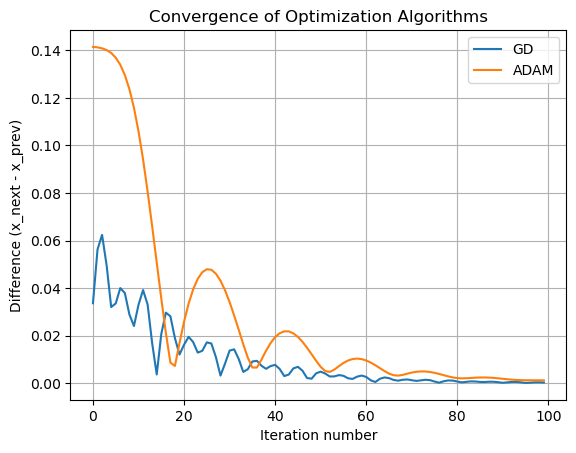

In [68]:
# Plotting the convergence graph
iterations = np.arange(num_iterations)
plt.plot(iterations, gd_momentum_diffs, label='GD')
plt.plot(iterations, adam_diffs, label='ADAM')
plt.xlabel('Iteration number')
plt.ylabel('Difference (x_next - x_prev)')
plt.title('Convergence of Optimization Algorithms')
plt.legend()
plt.grid(True)
plt.show()

## conclusions about the accuracy of the implemented algorithms
#### Rate of Convergence
The rate of convergence measures the speed at which an algorithm approaches the optimal solution. In this case, GD achieves a rate of convergence of approximately 0.0002901, while ADAM achieves a slightly higher rate of convergence of around 0.0011898. This indicates that ADAM converges faster than GD, making it more efficient in finding the optimal solution.

#### Optimized Value
The optimized value represents the minimum value of the objective function achieved by each algorithm. Both GD and ADAM successfully minimize the objective function, with GD achieving a value of approximately 1.000043 and ADAM achieving a value of around 1.000039. These values indicate that both algorithms have achieved a relatively low value for the objective function, suggesting that they have found acceptable solutions.

#### Optimized Position
The optimized position refers to the coordinates of the optimized point found by each algorithm. For GD, the optimized position is approximately [0.00011732, -0.00463667], while for ADAM, it is [-0.00092322, 0.0043952]. These positions represent the locations in the search space where the algorithms have found the minimum of the objective function. The difference in the sign and magnitude of the coordinates suggests that GD and ADAM explore different regions of the search space to find the optimal solution.

#### Conclusion
Based on the analysis of the table, ADAM demonstrates a faster convergence rate compared to GD, indicating its superior efficiency in finding the optimal solution. Both algorithms achieve similar optimized values, suggesting that they are capable of minimizing the objective function effectively. The difference in the optimized positions suggests that GD and ADAM explore different regions of the search space to find the optimal solution.
